In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, time

def timeSlot(row):
    if time(0,1,0) <= row.time() <= time(6,0,0):
        return 1
    elif time(6,1,0) <= row.time() <= time(12,0,0):
        return 2
    elif time(12,1,0) <= row.time() <= time(18,0,0):
        return 3
    else:
        return 4
    
n = 1
month = ['January', 'February', 'March', 'April', 'May', 'June']
time_slot_month_ny = {}
time_slot_month_borough = {}
parse_dates = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
df_zone = pd.read_csv('taxi _zone_lookup.csv', usecols=[0,1], encoding = 'ISO-8859-1')

while(n<7):
    csv_path = "C://Users/giuli/Desktop/Algorithmic methods of Data Mining/2 Homework/Dataset taxi 2018/yellow_tripdata_2018-0"+str(n)+".csv"

    df_taxi = pd.read_csv(csv_path, usecols = [1,2,3,4,7,8,9,16], parse_dates = parse_dates, encoding = 'ISO-8859-1') 

    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_pickup_datetime'].dt.month == n]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.year == 2018]
    df_taxi = df_taxi[df_taxi['tpep_dropoff_datetime'].dt.month <= n+1]
    df_taxi = df_taxi[df_taxi['passenger_count'] != 0] 

    df_join = pd.merge(df_taxi,df_zone, how = 'left', left_on=['PULocationID'], right_on=['LocationID'])
    
    del df_taxi

    df_join['time_slot'] = df_join['tpep_pickup_datetime'].apply(timeSlot)

    df_passenger = df_join[['passenger_count','time_slot','Borough']]
    
    del df_join

    passenger_count_ny = df_passenger.groupby(['time_slot']).passenger_count.sum()
    
    time_slot_month_ny[month[n-1]] = passenger_count_ny.to_dict()

    passenger_count_borough = df_passenger.groupby(['Borough','time_slot']).passenger_count.sum()
    
    passenger_count_borough_dict = passenger_count_borough.to_dict()

    total_passenger_borough = {}
    for i in passenger_count_borough_dict: 
        if i[0] not in total_passenger_borough:
            total_passenger_borough[i[0]] = passenger_count_borough_dict[i]
        else: 
             total_passenger_borough[i[0]] += passenger_count_borough_dict[i]

    d_percentage = {}
    for i in passenger_count_borough_dict: 
        d_percentage[i] = round((passenger_count_borough_dict[i] / total_passenger_borough[i[0]])*100,1)
        
    time_slot_month_borough[month[n-1]] = d_percentage
    n += 1
    

Text(0.5,1,'Number of passengers for each time slots, New York - From January to June 2018')

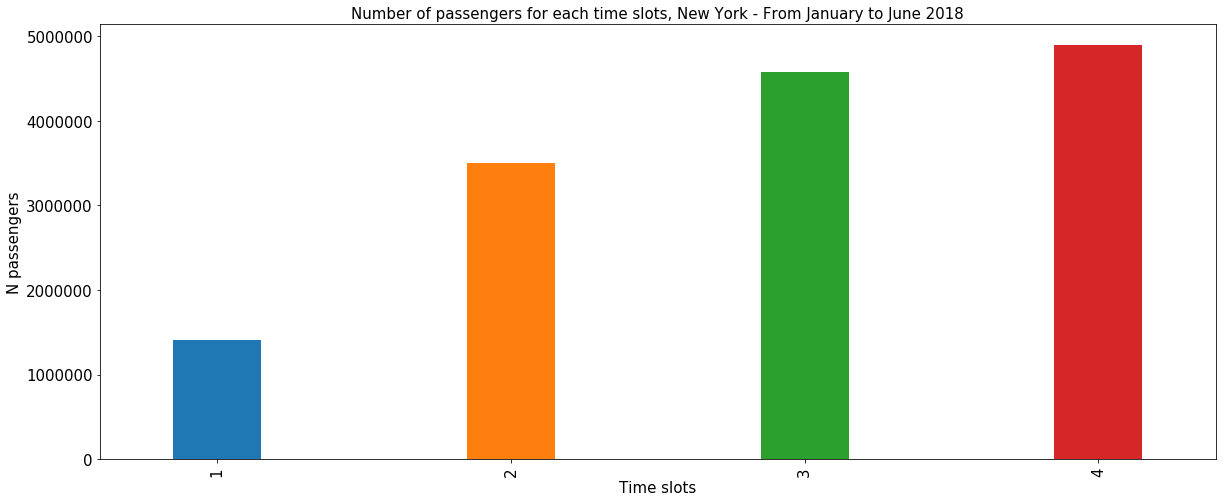

In [39]:
result = {}
for i in time_slot_month_ny: 
    for j in time_slot_month_ny[i]: 
        if j not in result: 
            result[j] = time_slot_month_ny[i][j]
        else: 
            result[j] += time_slot_month_ny[i][j]

for i in result: 
    result[i] = result[i]//6
    
ax = pd.Series(result).plot(kind='bar',figsize=(20,8),legend=False, fontsize=15, width = 0.3)
ax.set_xlabel("Time slots",fontsize=15)
ax.set_ylabel("N passengers",fontsize=15)
ax.set_title('Number of passengers for each time slots, New York - From January to June 2018', fontsize=15)

Text(0.5,1,'Percentage of passengers for each borough and time slots - From January to June 2018')

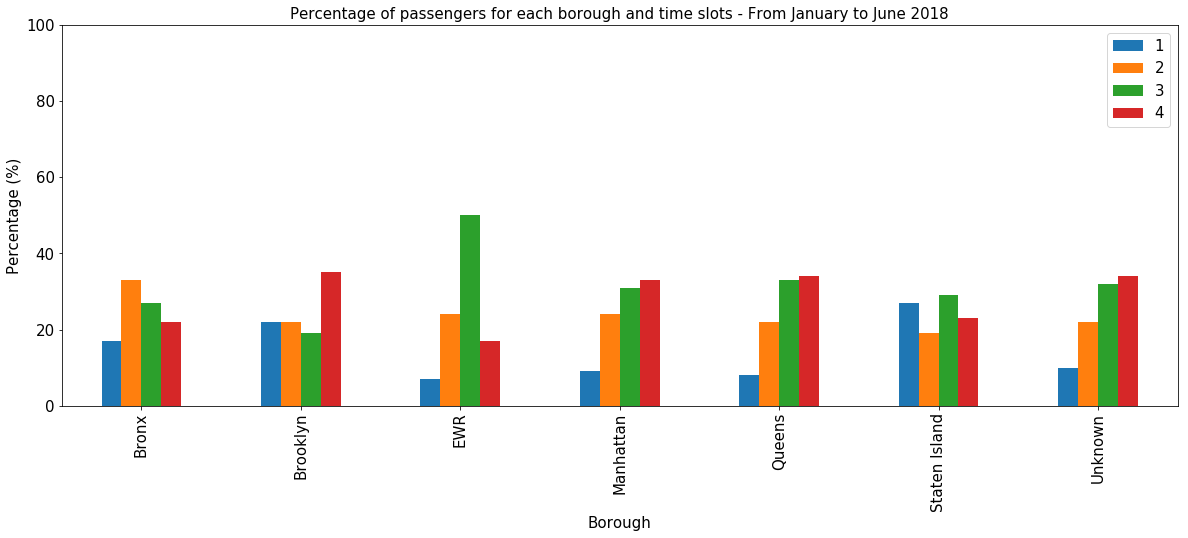

In [38]:
result = {}
for i in time_slot_month_borough: 
    for j in time_slot_month_borough[i]: 
        if j not in result: 
            result[j] = time_slot_month_borough[i][j]
        else: 
            result[j] += time_slot_month_borough[i][j]

for i in result: 
    result[i] = result[i]//6

ax = pd.Series(result).unstack().plot.bar(figsize=(20,7),fontsize = 15, ylim=[0,100])
ax.set_xlabel("Borough",fontsize=15)
ax.set_ylabel("Percentage (%)",fontsize=15)
ax.legend(fontsize=15)
ax.set_title('Percentage of passengers for each borough and time slots - From January to June 2018', fontsize=15)